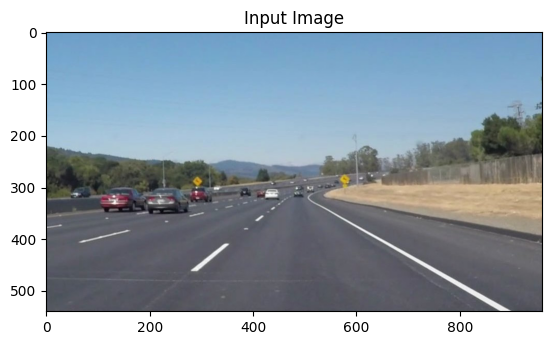

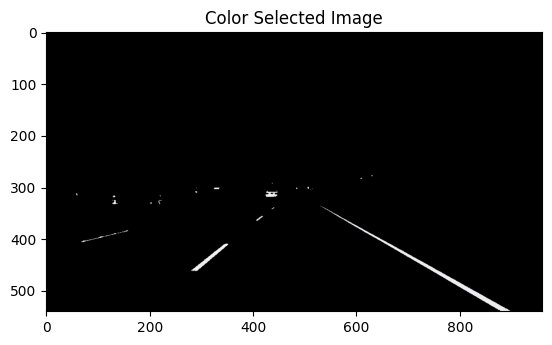

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('test_images/example1.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)

# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200
######

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Do a boolean or with the "|" character to identify
# pixels below the thresholds
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

# Display the image
plt.imshow(image)
plt.title("Input Image")
plt.show()
plt.imshow(color_select)
plt.title("Color Selected Image")
plt.show()

# Uncomment the following code if you are running the code locally and wish to save the image
# mpimg.imsave("test-after.jpg", color_select)


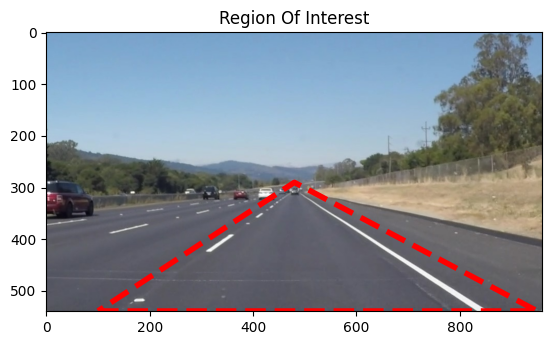

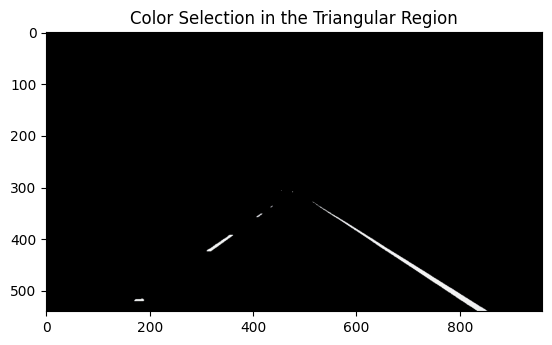

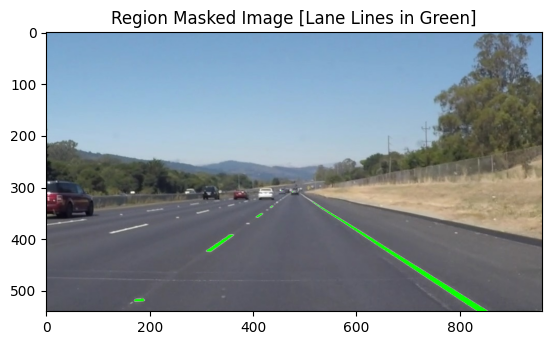

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('test_images/example2.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [100, 539]
right_bottom = [950, 539]
apex = [480, 290]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [9, 255, 0]

# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'r--', lw=4)
plt.title("Region Of Interest")
plt.show()
plt.imshow(color_select)
plt.title("Color Selection in the Triangular Region")
plt.show()
plt.imshow(line_image)
plt.title("Region Masked Image [Lane Lines in Green]")
plt.show()

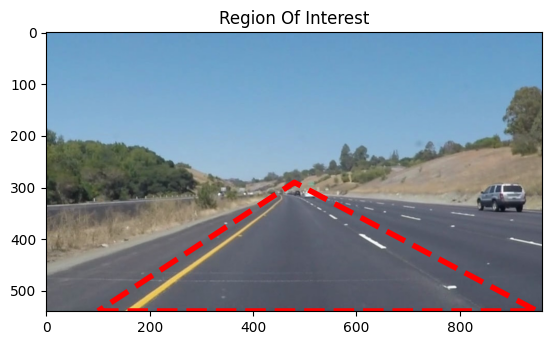

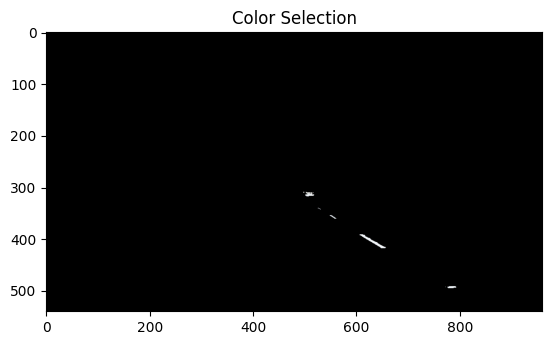

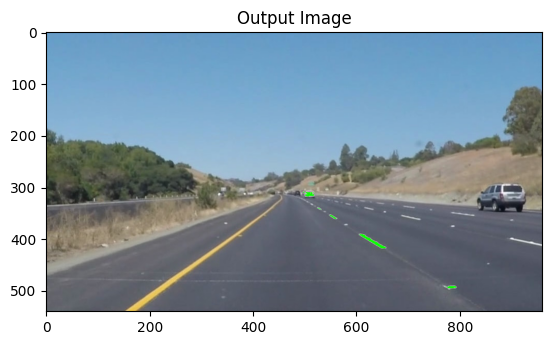

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('test_images/example3.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [100, 539]
right_bottom = [950, 539]
apex = [480, 290]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [9, 255, 0]

# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'r--', lw=4)
plt.title("Region Of Interest")
plt.show()
plt.imshow(color_select)
plt.title("Color Selection")
plt.show()
plt.imshow(line_image)
plt.title("Output Image")
plt.show()

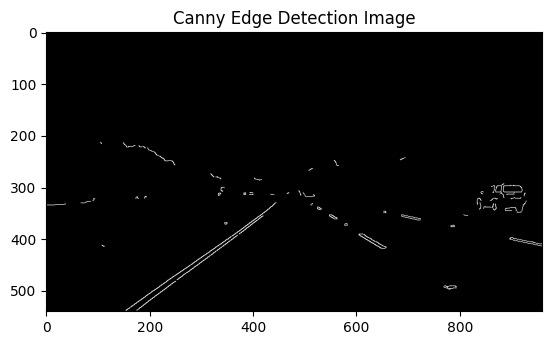

In [17]:
# Do all the relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the image and convert to grayscale
# Note: in the previous example we were reading a .jpg 
# Here we read a .png and convert to 0,255 bytescale
image = mpimg.imread('test_images/example3.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 5 # Must be an odd number (3, 5, 7...)
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and run it
low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')
plt.title("Canny Edge Detection Image")
plt.show()


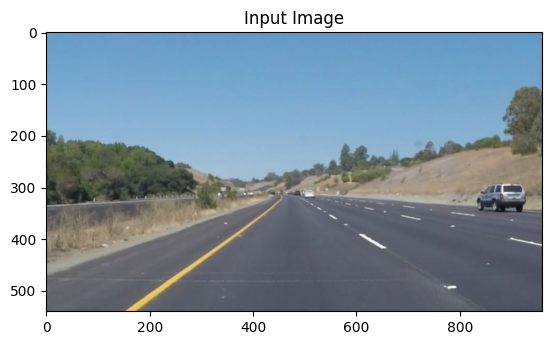

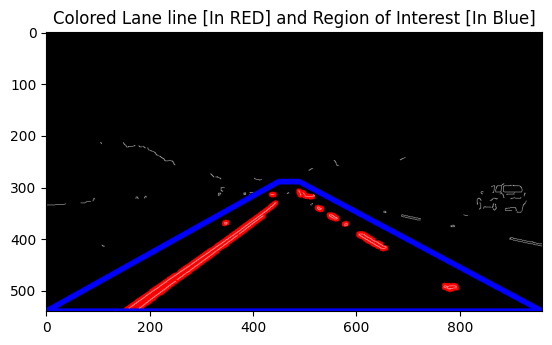

In [18]:
# Read in and grayscale the image
image = mpimg.imread('test_images/example3.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 2     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 4 #minimum number of pixels making up a line
max_line_gap = 5    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
lines_edges = cv2.polylines(lines_edges,vertices, True, (0,0,255), 10)
plt.imshow(image)
plt.title("Input Image")
plt.show()
plt.imshow(lines_edges)
plt.title("Colored Lane line [In RED] and Region of Interest [In Blue]")
plt.show()

In [19]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def canny(img, low_threshold, high_threshold):
    img = np.uint8(img)
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def slope_lines(image, lines):
    img = image.copy()
    poly_vertices = []
    order = [0, 1, 3, 2]

    left_lines = []
    right_lines = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            if x1 == x2:
                pass
            else:
                m = (y2 - y1) / (x2 - x1)
                c = y1 - m * x1
                if m < 0:
                    left_lines.append((m, c))
                elif m >= 0:
                    right_lines.append((m, c))

    if left_lines and right_lines:
        left_line = np.mean(left_lines, axis=0)
        right_line = np.mean(right_lines, axis=0)

        for slope, intercept in [left_line, right_line]:
            rows, cols = image.shape[:2]
            y1 = int(rows)
            y2 = int(rows * 0.6)
            x1 = int((y1 - intercept) / slope)
            x2 = int((y2 - intercept) / slope)
            poly_vertices.append((x1, y1))
            poly_vertices.append((x2, y2))
            draw_lines(img, np.array([[[x1, y1, x2, y2]]]))

        poly_vertices = [poly_vertices[i] for i in order]
        cv2.fillPoly(img, pts=np.array([poly_vertices], 'int32'), color=(0, 255, 0))

    return cv2.addWeighted(image, 0.7, img, 0.4, 0.)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    if lines is None:
        return np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    else:
        line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
        line_img = slope_lines(line_img, lines)
        return line_img

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    img = img.astype(np.uint8)
    initial_img = initial_img.astype(np.uint8)
    return cv2.addWeighted(initial_img, α, img, β, γ, dtype=cv2.CV_8U)

def get_vertices(image):
    rows, cols = image.shape[:2]
    bottom_left = [cols * 0.15, rows]
    top_left = [cols * 0.45, rows * 0.6]
    bottom_right = [cols * 0.95, rows]
    top_right = [cols * 0.55, rows * 0.6]
    ver = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    return ver




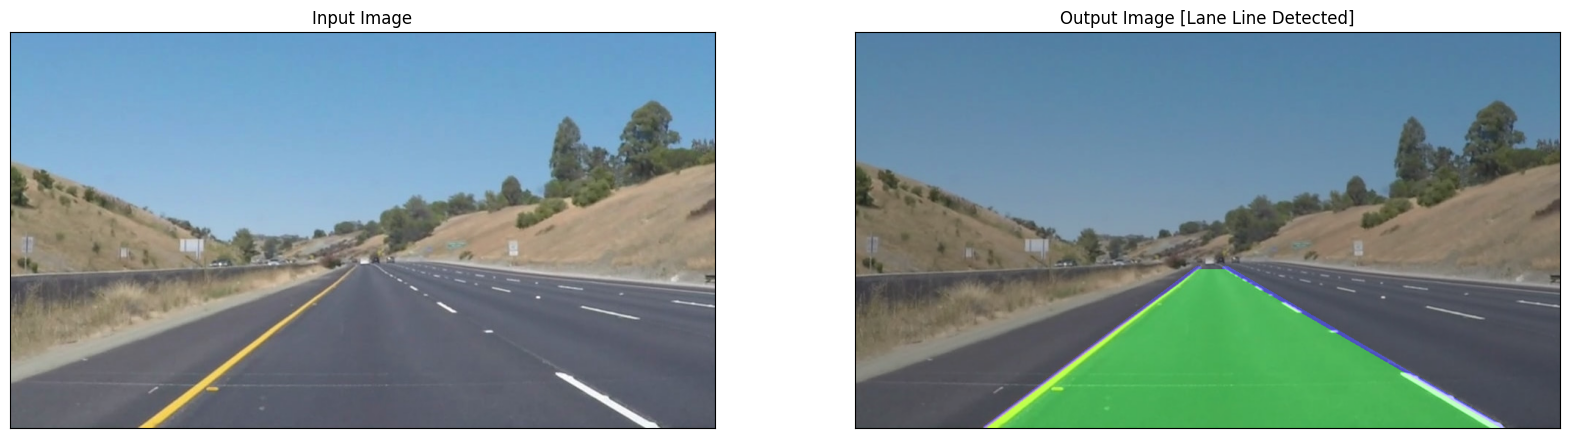

Processed image saved to ./outputs/processed_example6.jpg


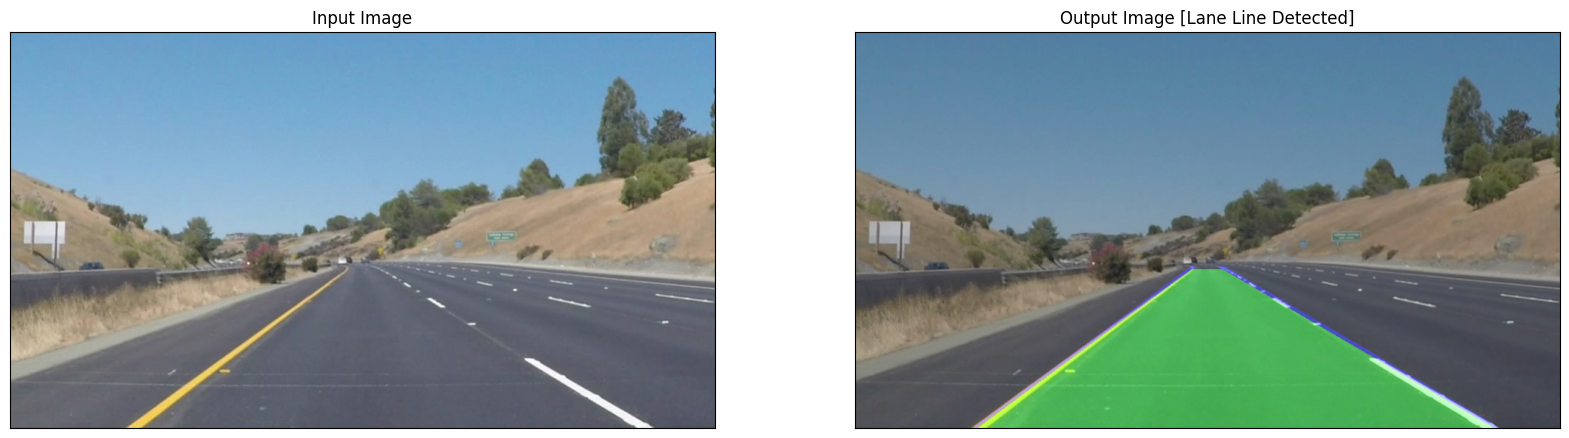

Processed image saved to ./outputs/processed_example4.jpg


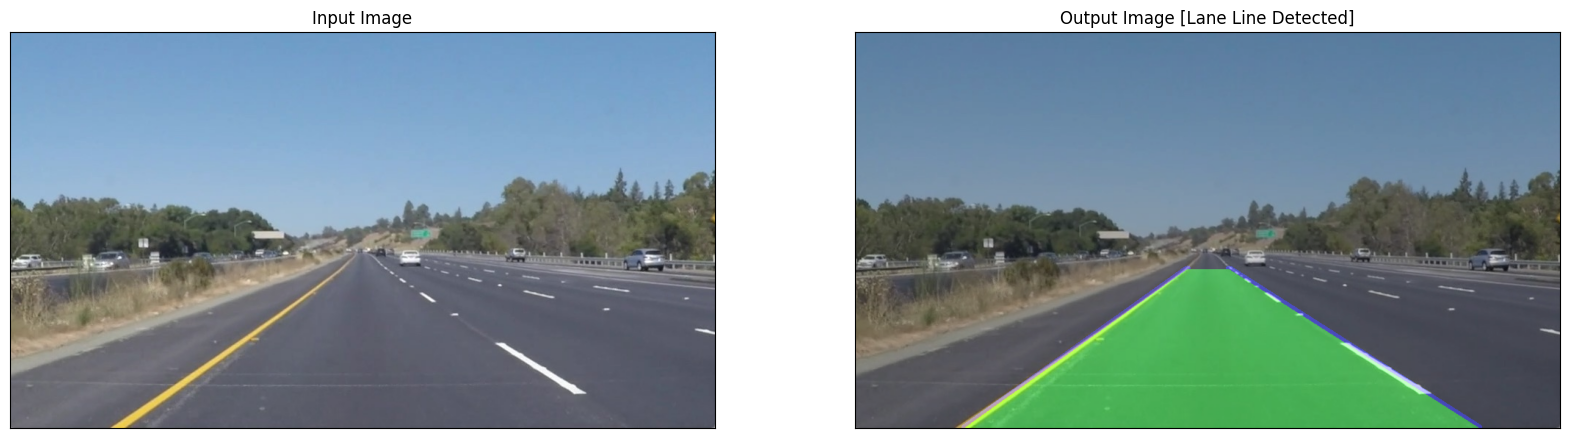

Processed image saved to ./outputs/processed_example5.jpg


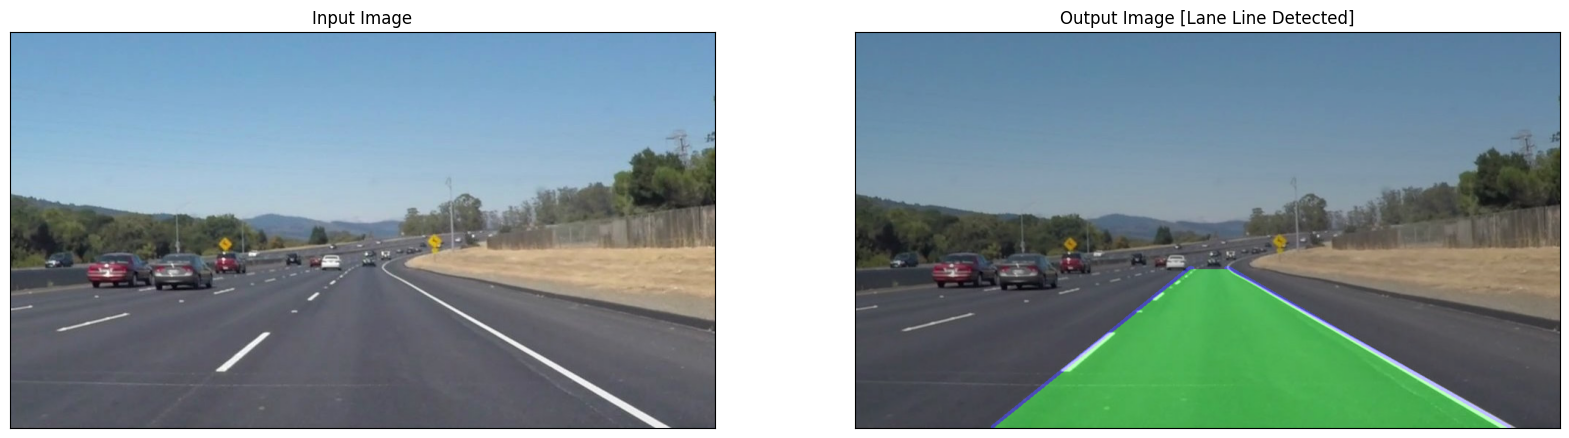

Processed image saved to ./outputs/processed_example1.jpg


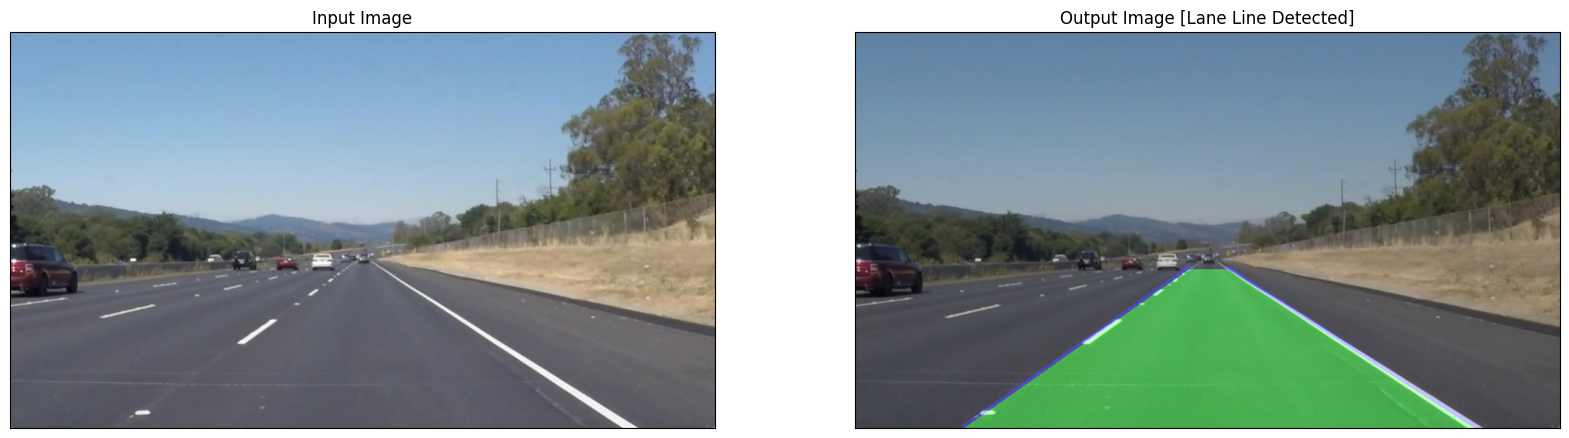

Processed image saved to ./outputs/processed_example2.jpg


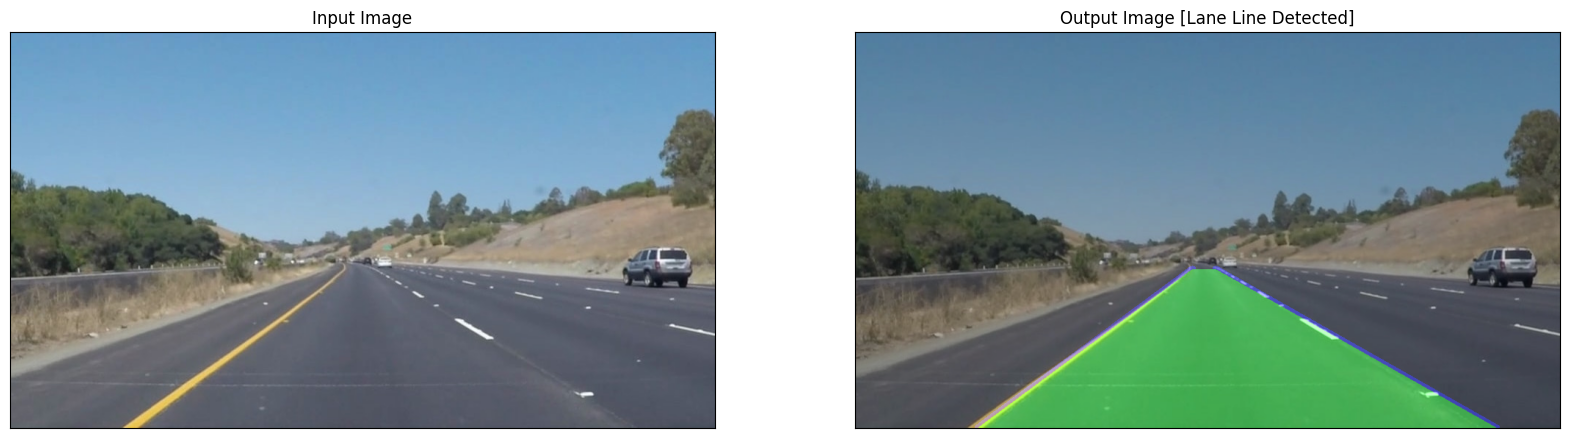

Processed image saved to ./outputs/processed_example3.jpg


In [20]:

def lane_finding_pipeline(image):
    gray_img = grayscale(image)
    smoothed_img = gaussian_blur(img=gray_img, kernel_size=5)
    canny_img = canny(img=smoothed_img, low_threshold=180, high_threshold=240)
    masked_img = region_of_interest(img=canny_img, vertices=get_vertices(image))
    houghed_lines = hough_lines(img=masked_img, rho=1, theta=np.pi/180, threshold=20, min_line_len=20, max_line_gap=180)
    houghed_lines = cv2.cvtColor(houghed_lines, cv2.COLOR_RGB2BGR)
    output = weighted_img(img=houghed_lines, initial_img=image, α=0.8, β=1., γ=0.)
    return output

output_dir = './outputs'
os.makedirs(output_dir, exist_ok=True)

for image_path in os.listdir('./test_images'):
    try:
        image_full_path = f'./test_images/{image_path}'
        fig = plt.figure(figsize=(20, 10))
        image = mpimg.imread(image_full_path)
        ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
        
        plt.imshow(image)
        ax.set_title("Input Image")

        processed_image = lane_finding_pipeline(image)

        ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
        plt.imshow(processed_image)
        ax.set_title("Output Image [Lane Line Detected]")

        plt.show()

        # Save the processed image
        output_image_path = os.path.join(output_dir, f'processed_{image_path}')
        plt.imsave(output_image_path, processed_image)
        print(f"Processed image saved to {output_image_path}")

    except (UnidentifiedImageError, IOError) as e:
        print(f"Error reading {image_path}: {e}")

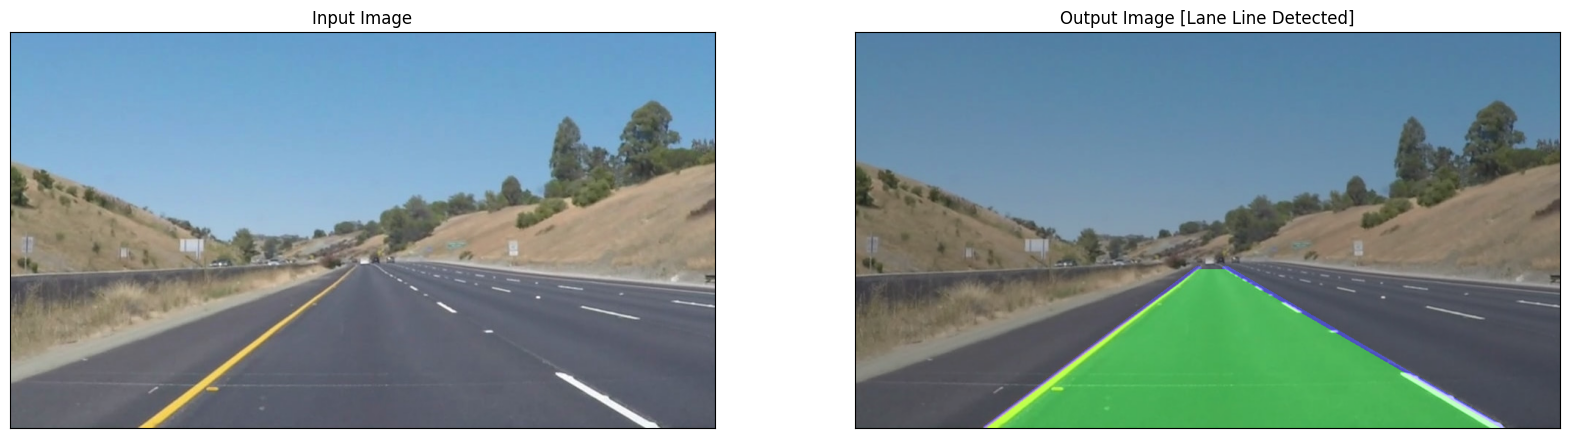

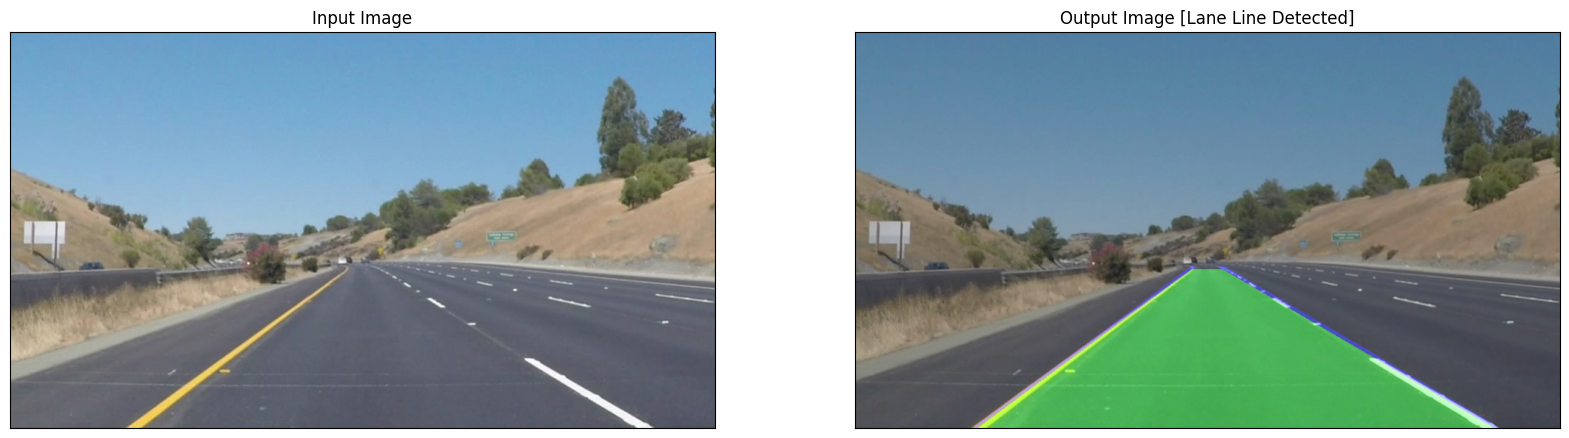

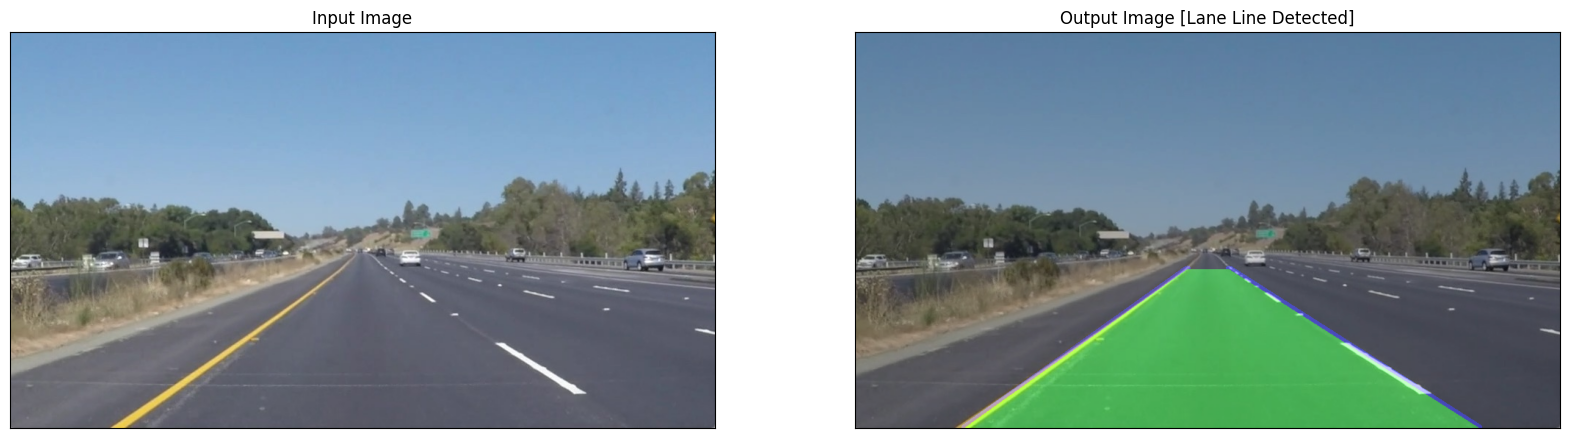

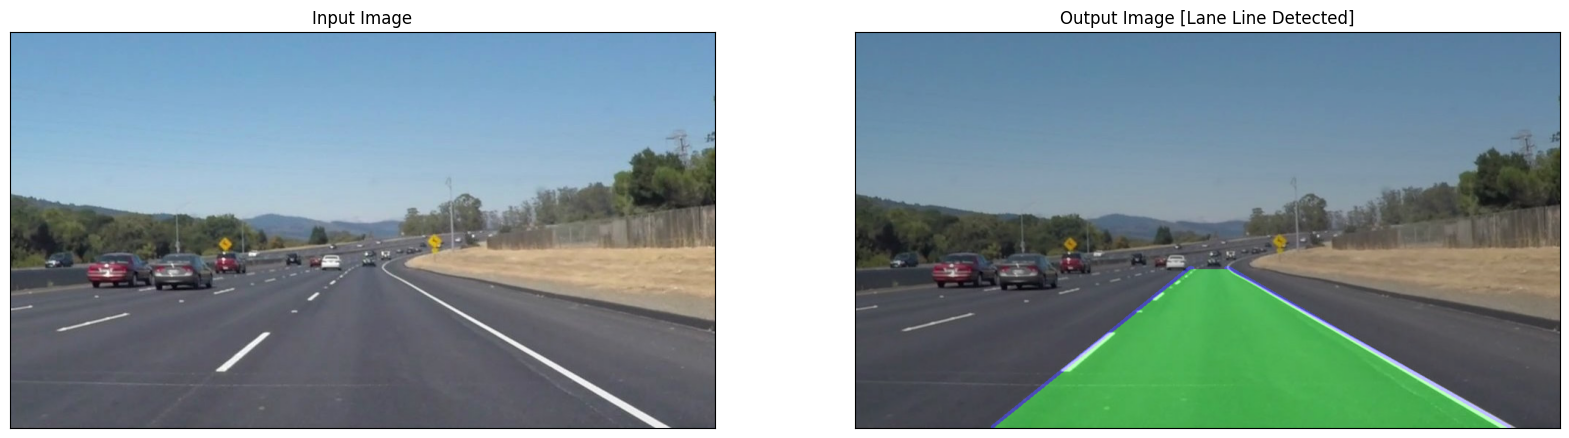

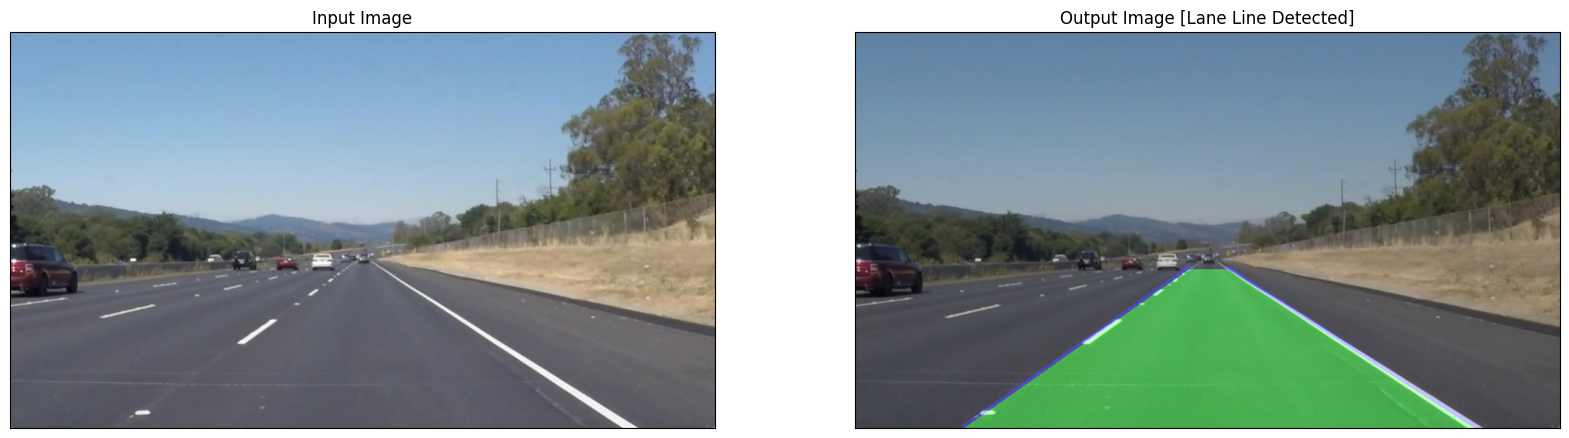

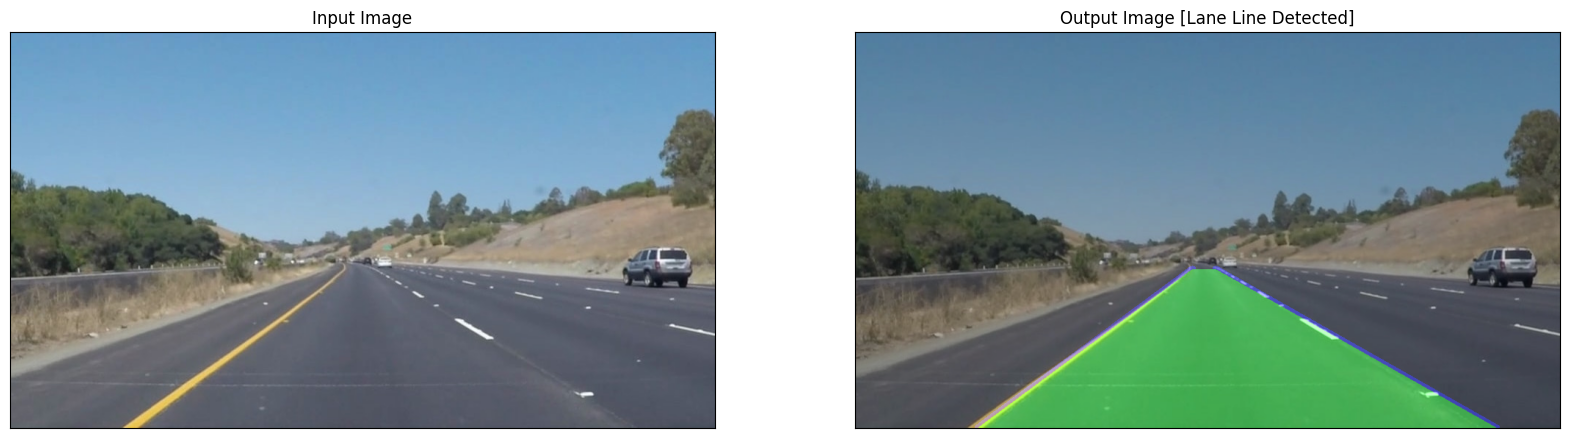

In [21]:
# Load and process images
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, UnidentifiedImageError

for image_path in os.listdir('./test_images'):
    try:
        fig = plt.figure(figsize=(20, 10))
        image = mpimg.imread(f'./test_images/{image_path}')
        ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
        
        plt.imshow(image)
        ax.set_title("Input Image")
        ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
        plt.imshow(lane_finding_pipeline(image))
        ax.set_title("Output Image [Lane Line Detected]")
        plt.show()
    except (UnidentifiedImageError, IOError) as e:
        print(f"Error reading {image_path}: {e}")
